VERLET ALGORITHM
In Verlet algorithm the equation for updating the position and velocity are-
\begin{aligned}
X(t+\Delta t/2)=X(t)+\Delta t/2(V(t))\\
V(t+\Delta t)=V(t) +\Delta t(t+\Delta t/2)\\
X(t+\Delta t)=X(t+\Delta t/2)+\Delta t/2(V(t+\Delta t/2))
\end{aligned}
where $X(t+\Delta t/2)$ is the position at time $t+\Delta t/2,V(t+\Delta t)$ is the velocity at time $t+\Delta t$ and $X(t+\Delta t)$ is te position at time $t+\Delta t$ 



PLANETARY MOTION

differential equations for the motion of a planet with sun at (0,0),
\begin{eqnarray}
\frac{d^2x}{dt^2}=-\frac{GM_sx}{R^3},\\
\frac{d^2y}{dt^2}=-\frac{GM_sy}{R^3},\\
x(0)=r_0,\\
y(0)=0,\\
V_x(0)=0,\\
V_y(0)=V_0\\
\end{eqnarray}

find non-dimensional positions by measuring the x and y values wrt $r_{0}$
\begin{eqnarray}
X=x/r_0,\\
Y=y/r_0
\end{eqnarray}

the differential equations become,
\begin{eqnarray}
\frac{d^2X}{dt^2}=-\frac{GM_sX}{(r_0)^3R^3},\\
\frac{d^2Y}{dt^2}=-\frac{GM_sY}{(r_0)^3R^3},\\
\end{eqnarray}
Natural Time scale
\begin{eqnarray}
T_0=\frac{r^3_0}{GM_s}
\end{eqnarray}

Non-dimensional unit of time,
$\tau$=$\frac{T_0}{t}$

thus the differential equations thus obtained are-
\begin{eqnarray}
\frac{d^2X}{d\tau^2}=-\frac{X}{R^3},\\
\frac{d^2Y}{d\tau^2}=-\frac{Y}{R^3},\\
\end{eqnarray}

In [3]:
import matplotlib.pyplot as plt
import math

In [45]:
def orbit(X0,Y0,Vx1,Vy1,dt,ft,flag):
    X = X0   
    Y = Y0
    V_x = Vx1    
    V_y = Vy1 ## Initial velocity in units of r_0/T
    A_x = -X/((X**2 + Y**2)**1.5)
    A_y = -Y/((X**2 + Y**2)**1.5)
    Energy = 0.5*(V_x*V_x + V_y*V_y) - 1./math.sqrt(X**2 + Y**2)
    time = 0.0         
    N = int(ft/dt)     ## Time increment
    Xs = [X]
    Ys = [Y]
    Es = [Energy]
    ts = [time]
    for i in range(0,N):
        X += 0.5*dt*V_x ## There are two position coordinates X and Y therefore the verlet algorithm will be applied twice. 
        Y += 0.5*dt*V_y
        A_x = -X/((X**2 + Y**2)**1.5)
        A_y = -Y/((X**2 + Y**2)**1.5)
        V_x += dt*A_x
        V_y += dt*A_y
        X += 0.5*dt*V_x
        Y += 0.5*dt*V_y
        Energy = 0.5*(V_x*V_x + V_y*V_y) - 1./math.sqrt(X**2 + Y**2) ## updated energy 
        time += dt
        Xs.append(X)
        Ys.append(Y)
        Es.append(Energy)
        ts.append(time)
    if flag==0:
        return Xs,Ys,ts
    elif flag==1:
        return Es

PLOTTING THE ORBIT

In [46]:
X,Y,t=orbit(1,0,0,1.3,0.01,100,0)

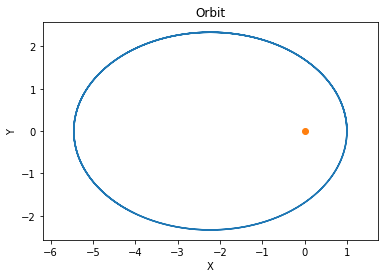

In [47]:
centre_x = 0.0
centre_y = 0.0
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Orbit')
plt.plot(X,Y)
plt.plot(centre_x, centre_y, marker = 'o')

PLOTTING ENERGY VS TIME GRAPH

In [48]:
E=orbit(1,0,0,1.3,0.01,100,1)

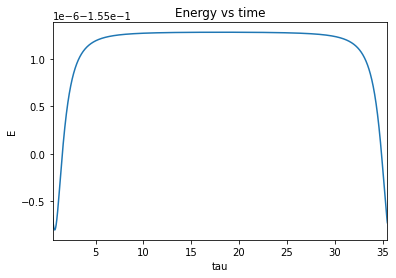

In [53]:
plt.xlabel('tau')
plt.ylabel('E')
plt.title('Energy vs time')
plt.xlim(0.5,35.5)
plt.plot(t,E)